In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from pymongo import MongoClient
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from talib import abstract

from functools import partial

In [2]:
#Download Data from yahoo
### TEST Scnarios - TCS- Bull ,ACC- modrate up (Sidewase),YESBank- Back to Zero ,ITC(stock dosnt even Move)
stock='YESbank'
startdate='2007-01-01'
enddate='2022-01-01'
exchange=['.NS','.BO']
dfo = yf.download(stock+exchange[0],start=startdate)

[*********************100%***********************]  1 of 1 completed


In [3]:
def pxline(to_plot):
    fig = px.line(to_plot)
    fig.show()

In [4]:
def _resample(df,_type):
    df=df.apply(lambda x: round(x,2))
    for i in _type:
        # df[f'{i}Open']=df['Open'].resample(f'{i}D').first()
        # df[f'{i}High']=df['High'].resample(f'{i}D').max()
        # df[f'{i}Low']=df['Low'].resample(f'{i}D').min()    
        # df[f'{i}Close']=df['Close'].resample(f'{i}D').last()
        df[f'{i}Open']=df['Open'].rolling(i).agg(lambda rows: rows[0])
        df[f'{i}High']=df['High'].rolling(i).max()
        df[f'{i}Low']=df['Low'].rolling(i).min()    
        df[f'{i}Close']=df['Close'].rolling(i).agg(lambda rows: rows[-1])
        
    df.replace(to_replace=np.nan,method='bfill',inplace=True)
    
    return df

In [5]:
df=dfo.copy()

In [6]:
df=_resample(df,[21,42,84,126,189,252])

In [7]:
df[['Close','126Open','252Close']]

,Close,126Open,252Close
Date,,,
2007-01-02,28.26,27.10,52.01
2007-01-03,27.92,27.10,52.01
2007-01-04,27.65,27.10,52.01
2007-01-05,27.69,27.10,52.01
2007-01-08,27.65,27.10,52.01
...,...,...,...
2022-02-10,13.85,12.35,13.85
2022-02-11,13.90,12.00,13.90
2022-02-14,13.25,12.00,13.25


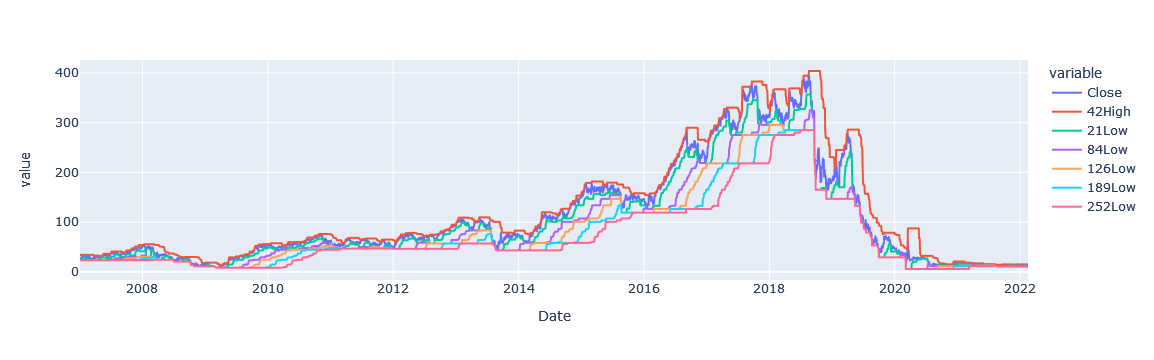

In [11]:
pxline(df[['Close','42High','21Low','84Low','126Low','189Low','252Low']])

In [13]:
tempdf=df[['Close','252Low']].copy()

In [16]:
tempdf['%diff']=(tempdf['Close']/tempdf['252Low'])-1

In [17]:
tempdf

,Close,252Low,%diff
Date,,,
2007-01-02,28.26,23.3,0.212876
2007-01-03,27.92,23.3,0.198283
2007-01-04,27.65,23.3,0.186695
2007-01-05,27.69,23.3,0.188412
2007-01-08,27.65,23.3,0.186695
...,...,...,...
2022-02-10,13.85,10.5,0.319048
2022-02-11,13.90,10.5,0.323810
2022-02-14,13.25,10.5,0.261905


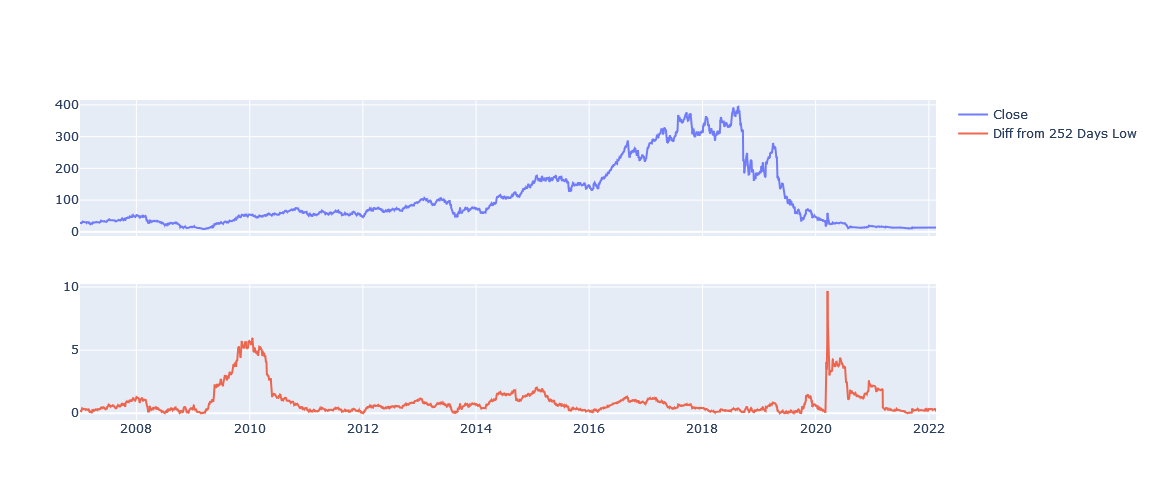

In [22]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True)
trace1 = go.Scatter(x=tempdf.index,y=tempdf['Close'],name='Close',mode='lines',opacity=0.9)
trace2 = go.Scatter(x=tempdf.index,y=tempdf['%diff'],name='Diff from 252 Days Low',mode='lines',opacity=0.9)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False,width=1200,height=500,paper_bgcolor="white",barmode='overlay',hovermode="closest")

fig.show()